In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecessary plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()

In [2]:
import sys
sys.path.append('/mongoa/ipynb/sandip/021115_sqt_analysis_30ppm/')
import blazmass_tools
from collections import Counter

In [3]:
unenriched_h1_dta_file = '120314_sampleH1sol_DTASelect-filter.txt'

In [4]:
import matplotlib.font_manager as fm
# fpath = '/usr/share/fonts/helvetica/Helvetica.ttf'
fpath = '/mongoa/ipynb/sandip/HelveticaNeue.ttf'
prop36 = fm.FontProperties(fname=fpath, size=36)
prop32 = fm.FontProperties(fname=fpath, size=32)
prop30 = fm.FontProperties(fname=fpath, size=30)
prop24 = fm.FontProperties(fname=fpath, size=24)
prop20 = fm.FontProperties(fname=fpath, size=20)
prop18 = fm.FontProperties(fname=fpath, size=18)
prop16 = fm.FontProperties(fname=fpath, size=16)
prop14 = fm.FontProperties(fname=fpath, size=14)

color = '#3498DB'
opacity = 1
file_extension = '.pdf' # .pdf, .jpg, .png

def get_distinct_psm_ids(dtaselect_parser):
    psms = set()
    for locus in dtaselect_parser:
        for peptide in locus['peptides']:
            psm_id = peptide['LCStep']+'_'+str(peptide['Scan'])+'_'+str(peptide['ChargeState'])
            psms.add(psm_id)
    return psms

def make_LCStep_histogram(psm_ids_set):
    full_lcstep_count = []
    for psm in psm_ids_set:
        full_lcstep_count.append(psm.split('_')[0])

    return Counter(full_lcstep_count)

def make_hist_and_plot(dtaselect_filename, ymaxlimit=None):
    parser = blazmass_tools.dta_select_parser(dtaselect_filename)
    psm_ids = get_distinct_psm_ids(parser)
    hist = make_LCStep_histogram(psm_ids)

    fig, ax = plt.subplots()
    fig.set_size_inches(12,10)
#     labels, values = zip(*sorted(hist.items()))
    labels, values = zip(*sorted(hist.items(), key=lambda x: int(x[0])))

    indexes = np.arange(len(labels))
    width = 1

    plt.bar(indexes, values, width, color=color, alpha=opacity)

    fmt = plt.ScalarFormatter(useOffset=False)
    plt.gca().xaxis.set_major_formatter(fmt)
    ax.set_xlabel('LC Step #', fontproperties=prop32)
    ax.set_ylabel('# high quality PSMs', fontproperties=prop32)
    if ymaxlimit:
        ax.set_ylim(0,ymaxlimit)

    for label in ax.get_yticklabels():
        label.set_fontproperties(prop24)

    remove_border()

    plt.title('Peptides identified per Liquid Chromatography Step\n{}'.format(dtaselect_filename),fontproperties=prop24, y=1.1)
    ax.set_xticks(indexes+width/2)
    ax.set_xticklabels(labels,fontproperties=prop24)
    plt.tight_layout()
    plt.show()

## unenriched sample

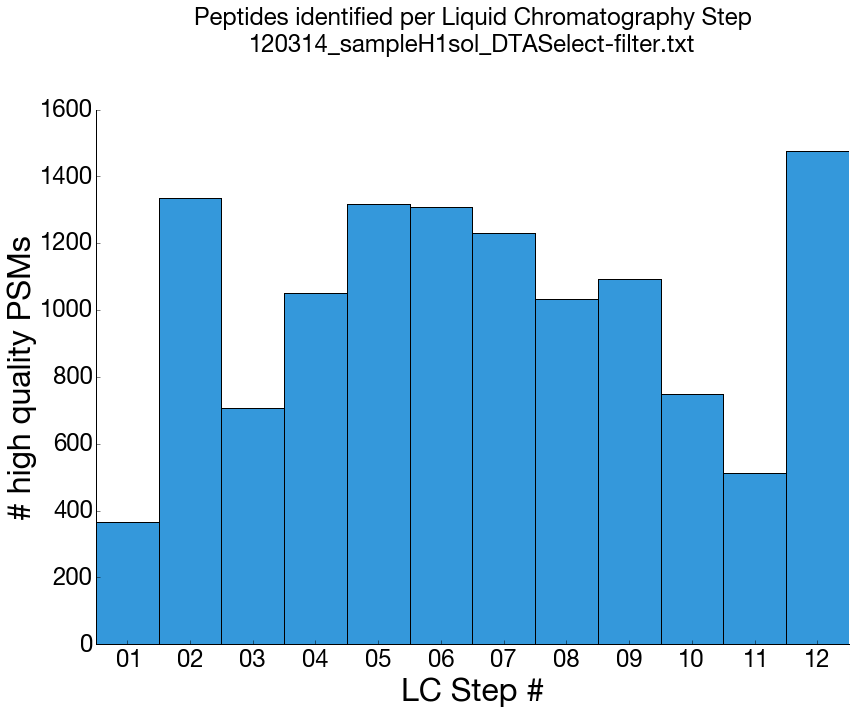

In [5]:
make_hist_and_plot(unenriched_h1_dta_file)

----

## probe-enriched samples (didn't plot negative control)

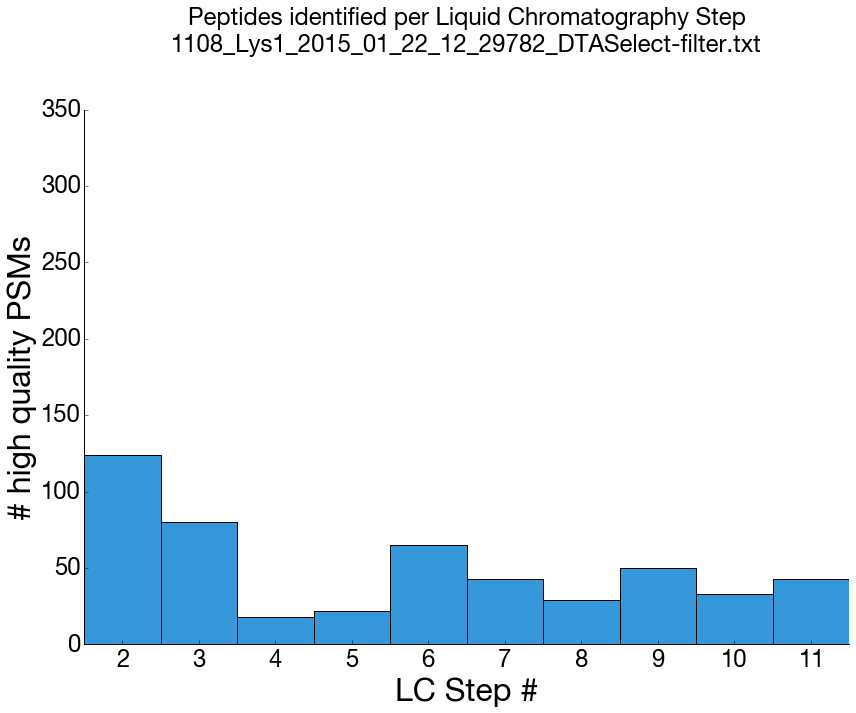

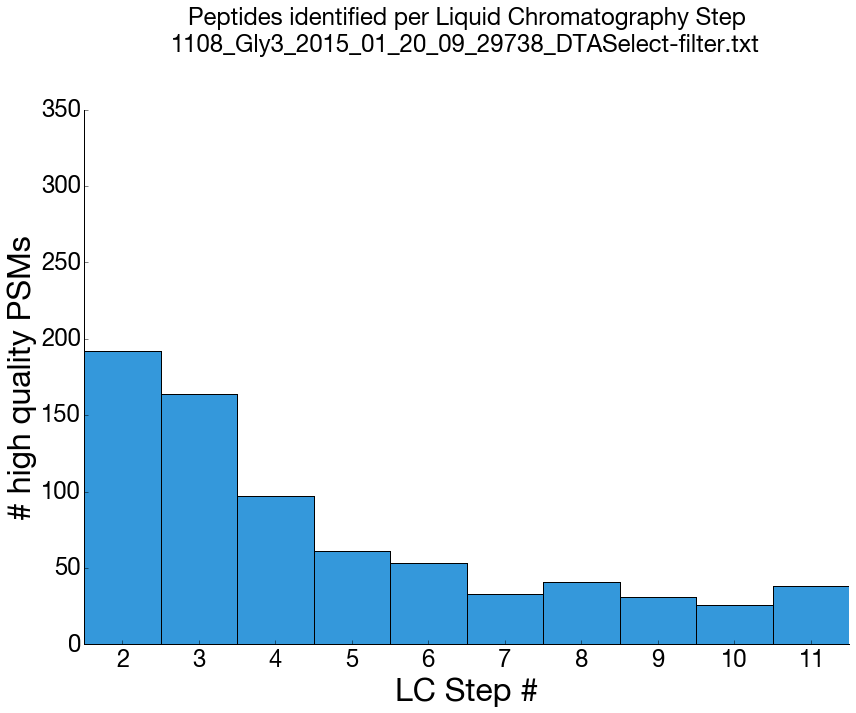

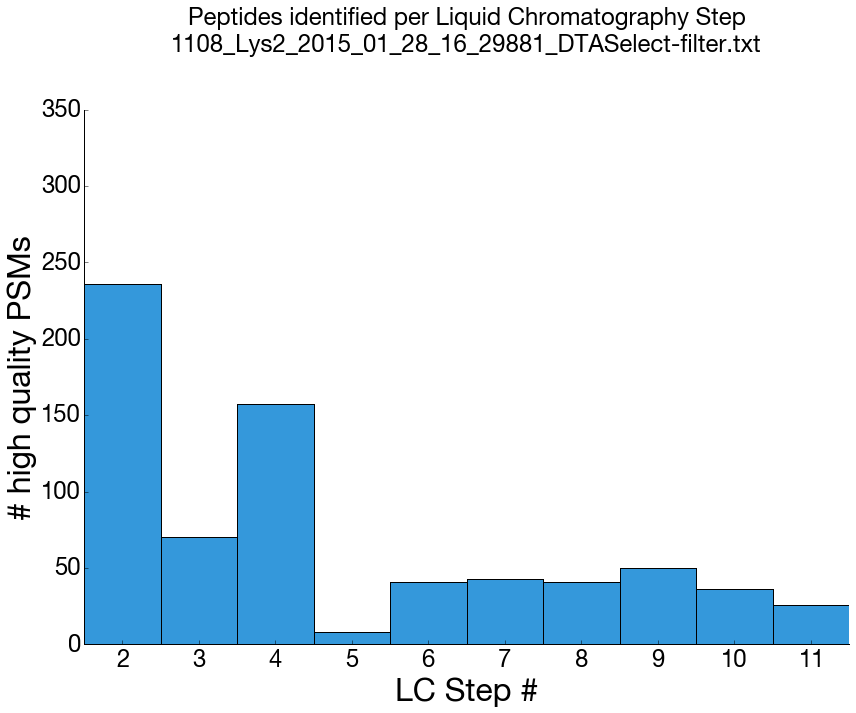

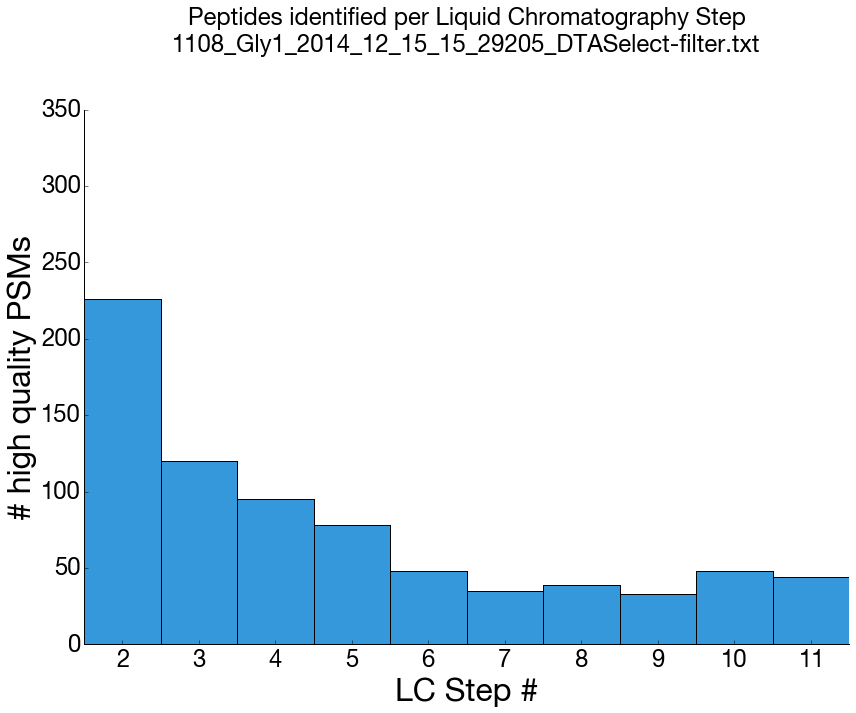

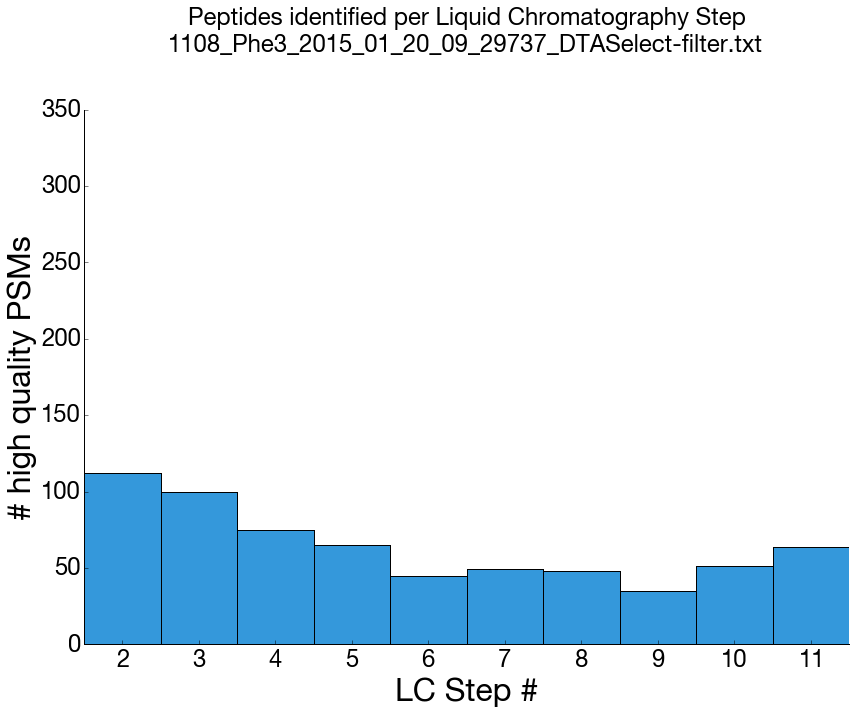

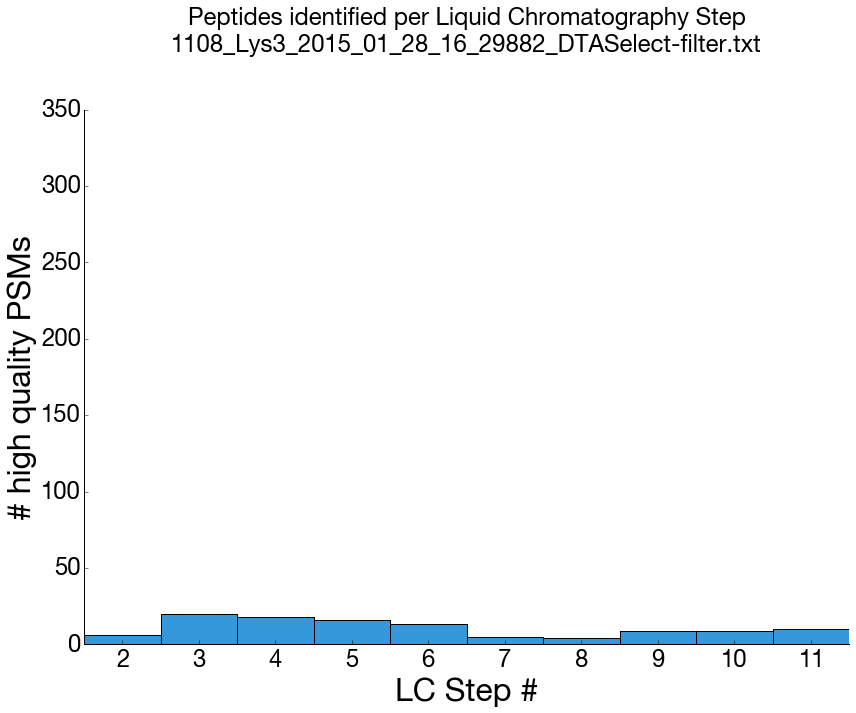

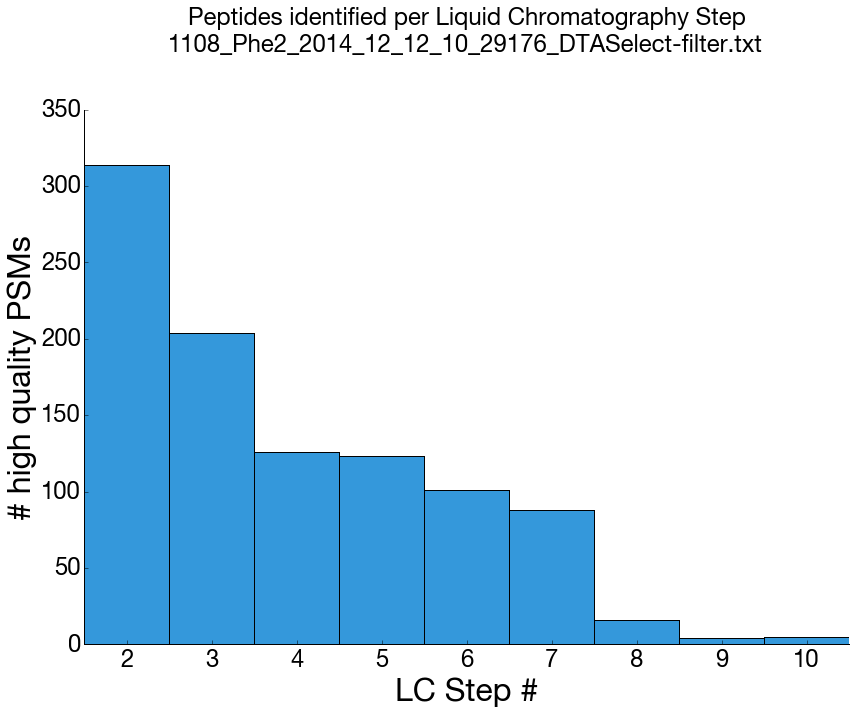

In [6]:
import glob
probe_dtaselect_files = glob.glob('1108*DTASelect-filter.txt')
for filename in probe_dtaselect_files:
    make_hist_and_plot(filename, ymaxlimit=350)

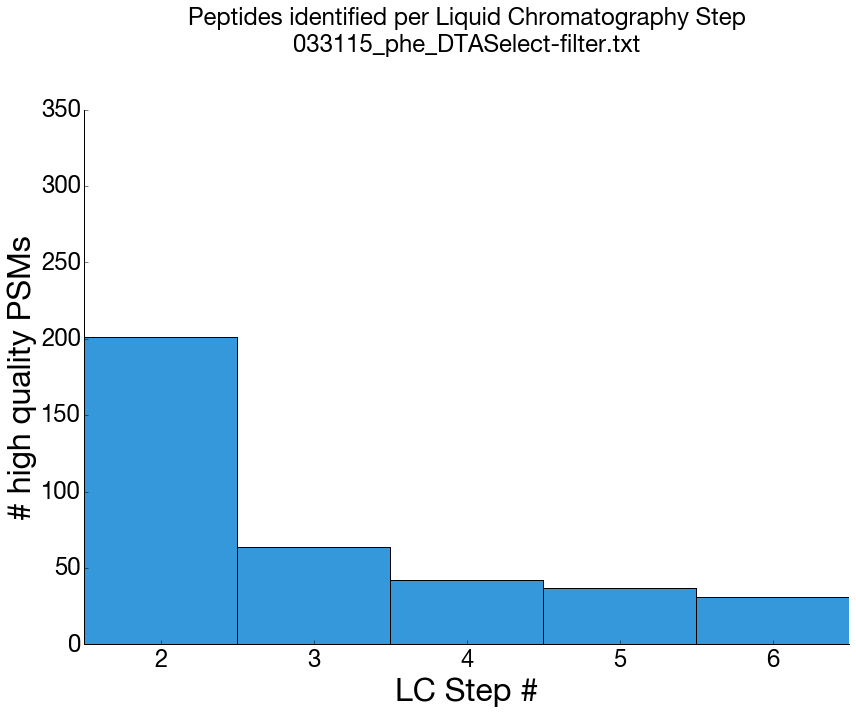

In [7]:
make_hist_and_plot('033115_phe_DTASelect-filter.txt', ymaxlimit=350)